# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict the monthly sales of a particular store. The data that we have ranges from 2013 to 2017.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read the data as a monthly Time Series from the '.csv' file.

In [2]:
df_1 = pd.read_csv("monthly sales.csv",parse_dates=True,squeeze=True,index_col=0)

In [3]:
print(df_1.head())
print(df_1.tail()).

Month
Jan-13    454904
Feb-13    459417
Mar-13    617382
Apr-13    682274
May-13    763242
Name: Sales, dtype: int64
Month
Aug-17    1026403
Sep-17     935263
Oct-17     891160
Nov-17     928837
Dec-17     695170
Name: Sales, dtype: int64


In [4]:
df_2 = pd.read_csv("monthly sales.csv")

In [5]:
df_2.head()

,Month,Sales
0,Jan-13,454904
1,Feb-13,459417
2,Mar-13,617382
3,Apr-13,682274
4,May-13,763242


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
date = pd.date_range(start='1/1/2013', end='1/1/2018', freq='M')
date

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
      

In [8]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,Month,Sales,Time_Stamp
0,Jan-13,454904,2013-01-31
1,Feb-13,459417,2013-02-28
2,Mar-13,617382,2013-03-31
3,Apr-13,682274,2013-04-30
4,May-13,763242,2013-05-31


In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       60 non-null     object        
 1   Sales       60 non-null     int64         
 2   Time_Stamp  60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


In [10]:
df_2['Time_Stamp'] = pd.to_datetime(df_2['Time_Stamp'])

In [11]:
df = df_2.set_index('Time_Stamp')
df.drop(['Month'], axis=1, inplace=True)
df.head()

,Sales
Time_Stamp,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

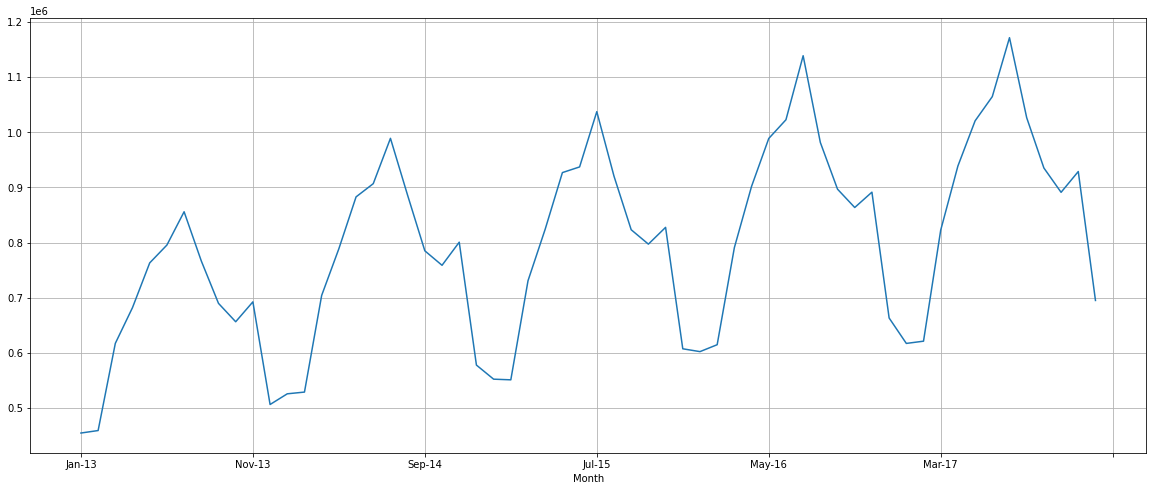

In [13]:
df_1.plot(figsize=(20,8))
plt.grid();

There seems to be a trend with a seasonality as well.

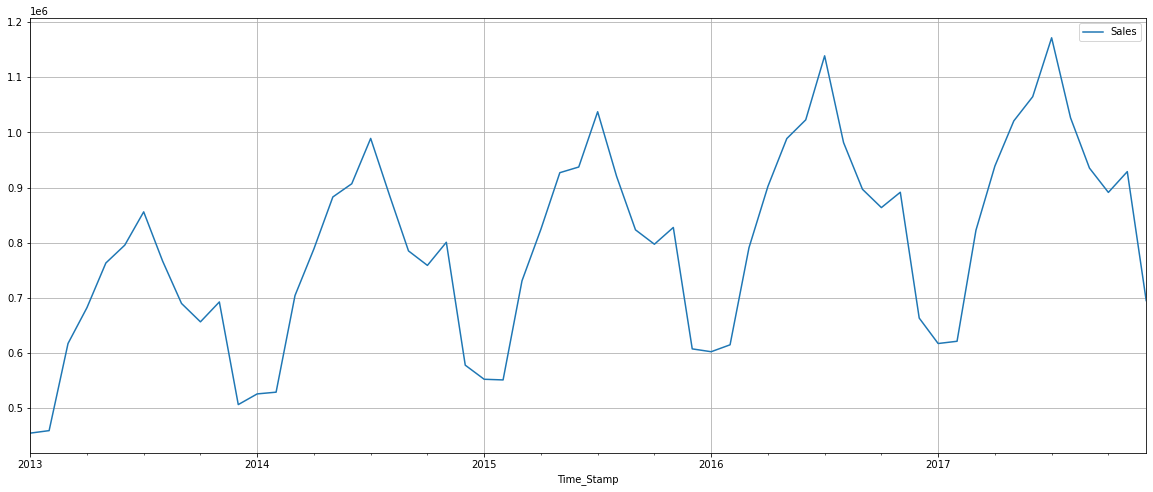

In [14]:
## Plotting the same graph from the second dataframe with the date-time modifications

df.plot(figsize=(20,8))
plt.grid();

## Check the basic measures of descriptive statistics of the Time Series

In [15]:
round(df.describe(),3)

,Sales
count,60.000
mean,795075.200
std,172901.778
min,454904.000
25%,661705.000
50%,799018.000
75%,922026.250
max,1171393.000


## Plot a boxplot to understand the spread of sales across different years and within different months across years.

### Yearly Boxplot

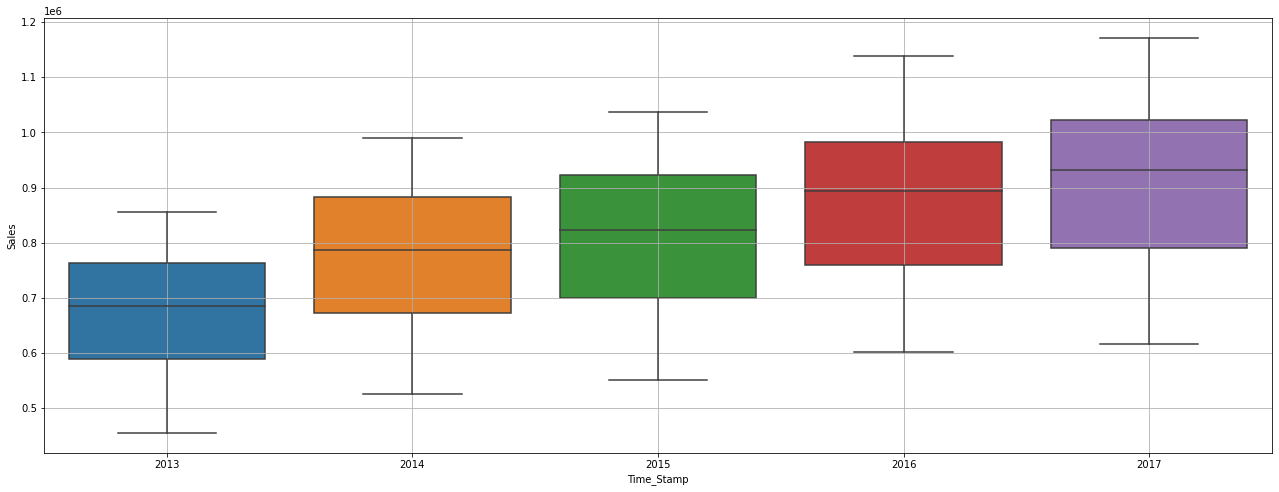

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.Sales,ax=ax)
plt.grid();

### Monthly Boxplot

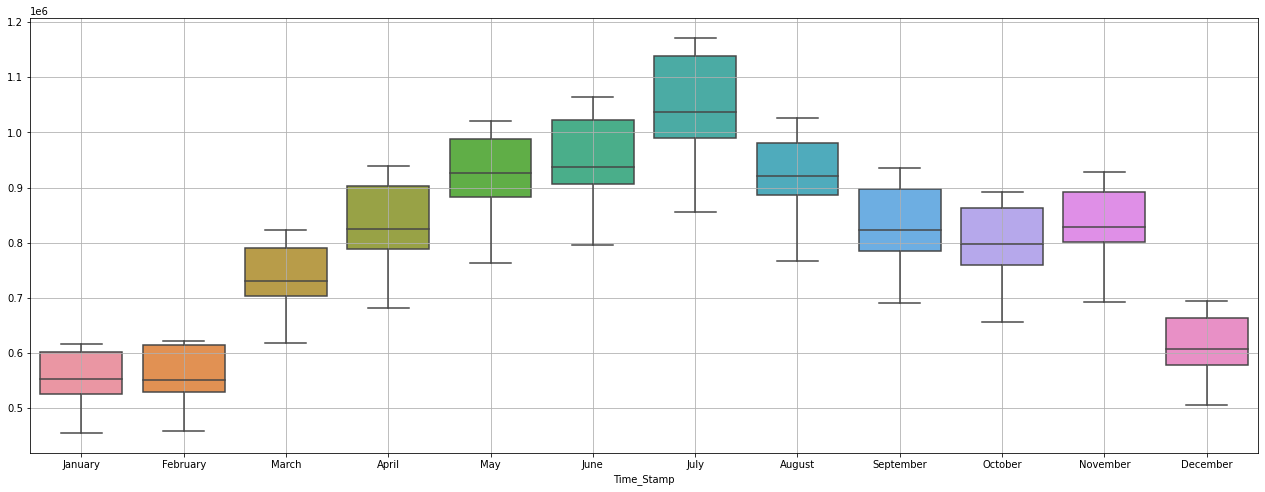

In [17]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

We see that there is maximum sales in the month of July.

## Plot a graph of monthly sales across years.

In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2013,682274,766761,506607,459417,454904,855922,795597,617382,763242,692643,656587,689907
2014,788914,885596,578048,529117,525987,989010,906842,704301,882877,800783,758883,785124
2015,824467,920401,607572,551317,552513,1037350,937184,730951,926902,827645,797253,823332
2016,901950,981494,663411,614957,602439,1138718,1022664,790881,988730,891448,863637,896831
2017,938862,1026403,695170,621369,617306,1171393,1064624,822667,1020686,928837,891160,935263


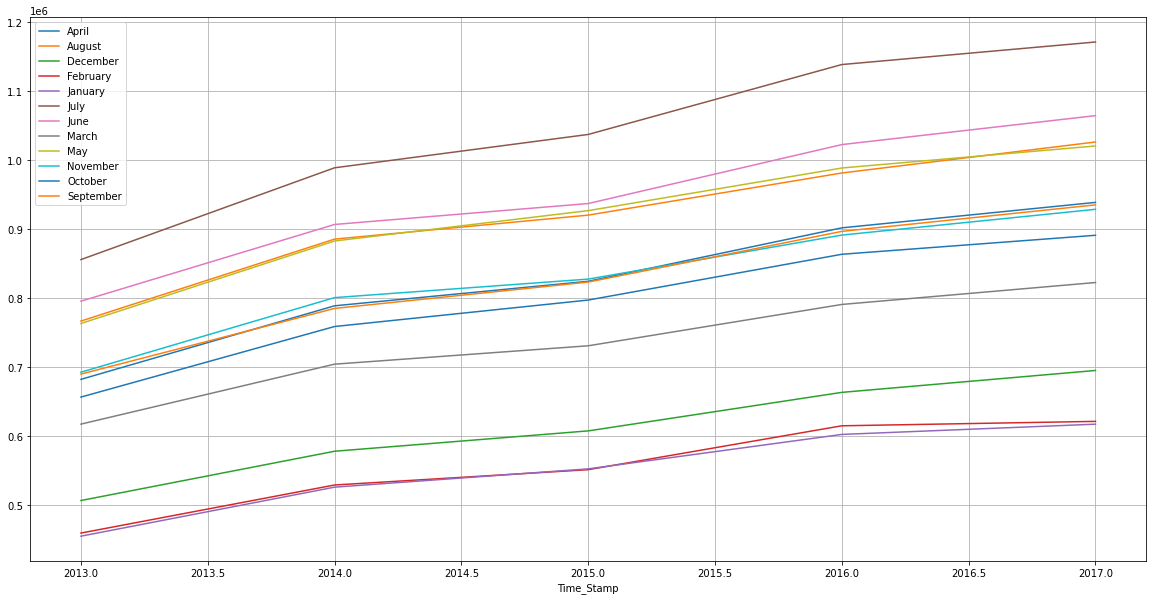

In [19]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that July has the highest sales across years.

## Decompose the Time Series

In [20]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

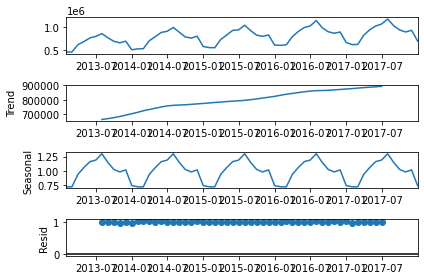

In [26]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [27]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2013-01-31              NaN
2013-02-28              NaN
2013-03-31              NaN
2013-04-30              NaN
2013-05-31              NaN
2013-06-30              NaN
2013-07-31    664732.041667
2013-08-31    670598.000000
2013-09-30    677123.791667
2013-10-31    685188.750000
2013-11-30    694616.875000
2013-12-31    704236.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2013-01-31    0.718566
2013-02-28    0.718591
2013-03-31    0.939727
2013-04-30    1.057405
2013-05-31    1.162961
2013-06-30    1.189905
2013-07-31    1.301998
2013-08-31    1.146979
2013-09-30    1.025370
2013-10-31    0.980572
2013-11-30    1.017522
2013-12-31    0.740405
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2013-01-31         NaN
2013-02-28         NaN
2013-03-31         NaN
2013-04-30         NaN
2013-05-31         NaN
2013-06-30         NaN
2013-07-31    0.988957
2013-08-31    0.996879
2013-09-30    0.993670
2013-10-31    0.977243
2013-11-30    0.979987
2013-1

In [28]:
deseason_TS=trend+residual

<AxesSubplot:xlabel='Time_Stamp'>

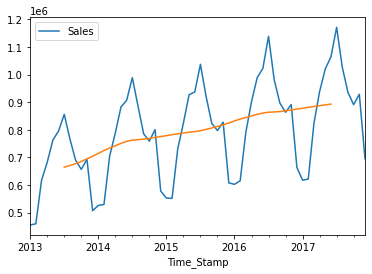

In [29]:
df.plot();
deseason_TS.plot()

## Split the data into train and test and plot the training and test data.

In [30]:
len(df)*0.7

42.0

In [31]:
# Spliting is has to be sequential with time ( No Random Split)
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [32]:
print(train.shape)
print(test.shape)

(42, 1)
(18, 1)


In [33]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Sales
Time_Stamp        
2013-01-31  454904
2013-02-28  459417
2013-03-31  617382
2013-04-30  682274
2013-05-31  763242 

Last few rows of Training Data 
               Sales
Time_Stamp         
2016-02-29   614957
2016-03-31   790881
2016-04-30   901950
2016-05-31   988730
2016-06-30  1022664 

First few rows of Test Data 
               Sales
Time_Stamp         
2016-07-31  1138718
2016-08-31   981494
2016-09-30   896831
2016-10-31   863637
2016-11-30   891448 

Last few rows of Test Data 
               Sales
Time_Stamp         
2017-08-31  1026403
2017-09-30   935263
2017-10-31   891160
2017-11-30   928837
2017-12-31   695170 



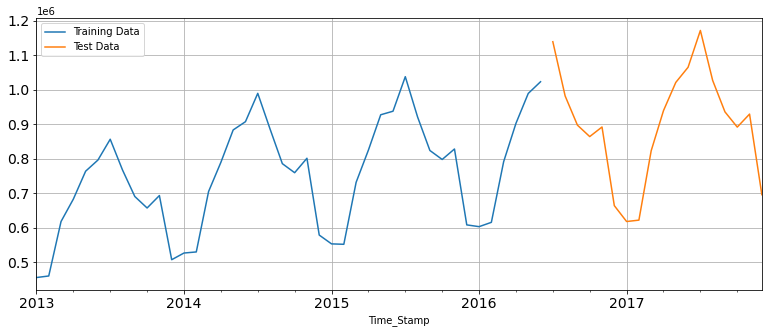

In [34]:
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [35]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [36]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [37]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Sales  time
Time_Stamp              
2013-01-31  454904     1
2013-02-28  459417     2
2013-03-31  617382     3
2013-04-30  682274     4
2013-05-31  763242     5 

Last few rows of Training Data 
               Sales  time
Time_Stamp               
2016-02-29   614957    38
2016-03-31   790881    39
2016-04-30   901950    40
2016-05-31   988730    41
2016-06-30  1022664    42 

First few rows of Test Data 
               Sales  time
Time_Stamp               
2016-07-31  1138718    43
2016-08-31   981494    44
2016-09-30   896831    45
2016-10-31   863637    46
2016-11-30   891448    47 

Last few rows of Test Data 
               Sales  time
Time_Stamp               
2017-08-31  1026403    56
2017-09-30   935263    57
2017-10-31   891160    58
2017-11-30   928837    59
2017-12-31   695170    60 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

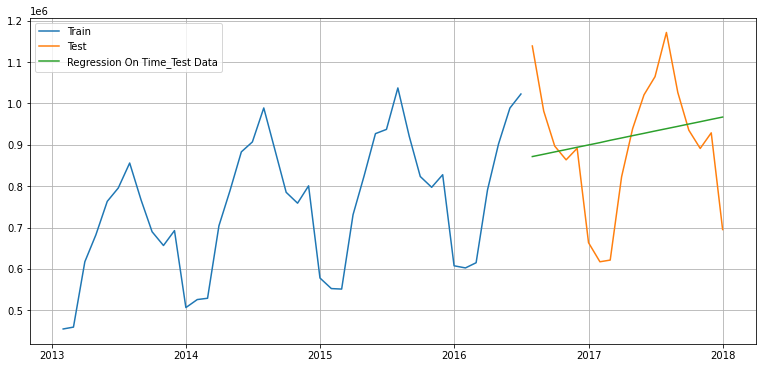

In [41]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Defining the accuracy metrics.

In [42]:
from sklearn import metrics

### Model Evaluation

In [43]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)  
mape_model1_test = metrics.mean_absolute_percentage_error(test['Sales'],test_predictions_model1)*100
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 163404.817 MAPE is 15.64


In [44]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test],'Test MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [45]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [46]:
NaiveModel_train.tail()

,Sales
Time_Stamp,
2016-02-29,614957
2016-03-31,790881
2016-04-30,901950
2016-05-31,988730
2016-06-30,1022664


In [47]:
len(np.asarray(train['Sales']))-1

41

In [48]:
np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]

1022664

In [49]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
2016-07-31    1022664
2016-08-31    1022664
2016-09-30    1022664
2016-10-31    1022664
2016-11-30    1022664
Name: naive, dtype: int64

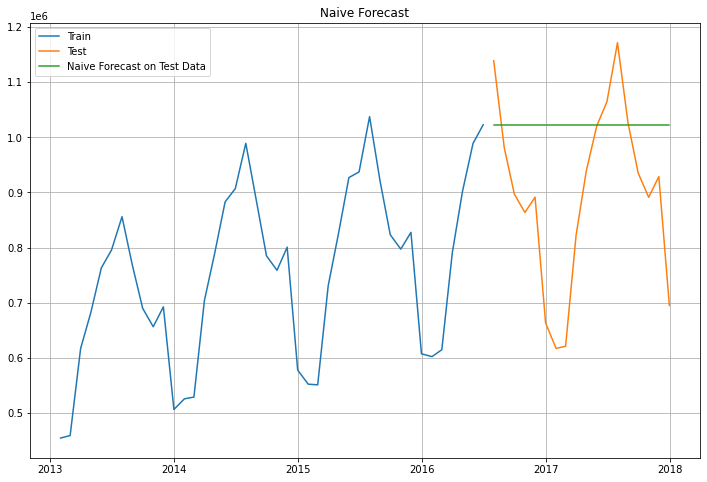

In [50]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [51]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_test = metrics.mean_absolute_percentage_error(test['Sales'],NaiveModel_test['naive'])*100
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 202735.276 MAPE is 20.98


In [52]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test],'Test MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [53]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [54]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Sales,mean_forecast
Time_Stamp,,
2016-07-31,1138718,750838.880952
2016-08-31,981494,750838.880952
2016-09-30,896831,750838.880952
2016-10-31,863637,750838.880952
2016-11-30,891448,750838.880952


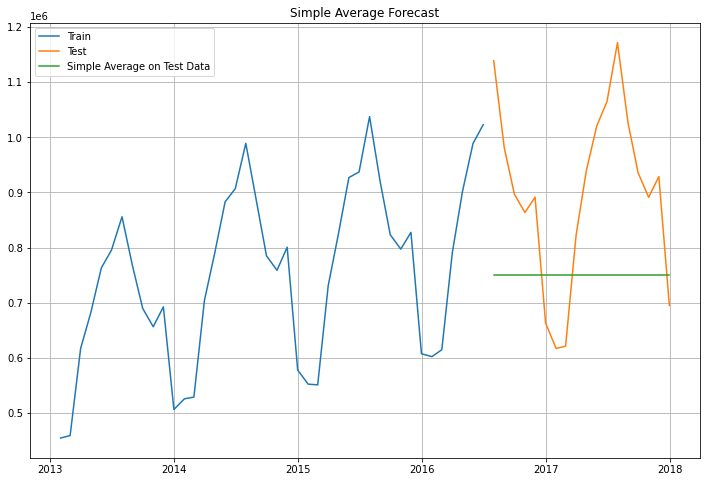

In [55]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [56]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = metrics.mean_absolute_percentage_error(test['Sales'],SimpleAverage_test['mean_forecast'])*100
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 217661.009 MAPE is 20.47


In [57]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test],'Test MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [58]:
MovingAverage = df.copy()
MovingAverage.head()

,Sales
Time_Stamp,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


#### Trailing moving averages

In [59]:

MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head(10)

,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
2013-01-31,454904,NaN,NaN,NaN,NaN
2013-02-28,459417,457160.5,NaN,NaN,NaN
2013-03-31,617382,538399.5,NaN,NaN,NaN
2013-04-30,682274,649828.0,553494.25,NaN,NaN
2013-05-31,763242,722758.0,630578.75,NaN,NaN
2013-06-30,795597,779419.5,714623.75,628802.666667,NaN
2013-07-31,855922,825759.5,774258.75,695639.000000,NaN
2013-08-31,766761,811341.5,795380.50,746863.000000,NaN
2013-09-30,689907,728334.0,777046.75,758950.500000,676156.222222


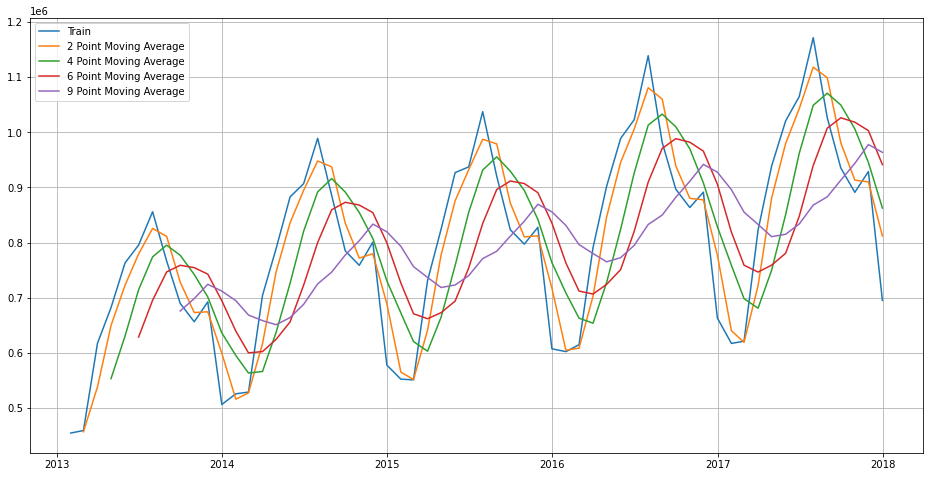

In [60]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [61]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

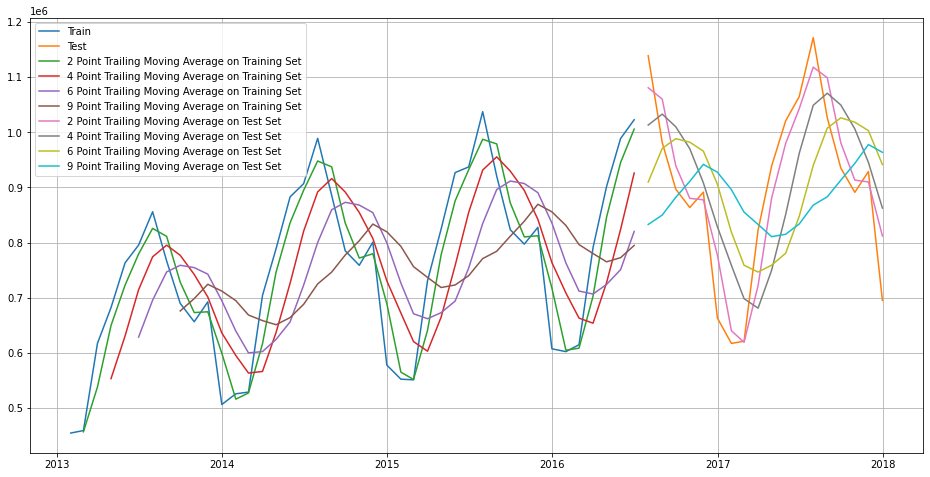

In [62]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [63]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = metrics.mean_absolute_percentage_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'])*100
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = metrics.mean_absolute_percentage_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'])*100
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = metrics.mean_absolute_percentage_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'])*100
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = metrics.mean_absolute_percentage_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'])*100
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 60405.468 MAPE is 5.83
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 120837.916 MAPE is 12.93
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 164346.870 MAPE is 17.01
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 185658.328 MAPE is 18.02


In [64]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

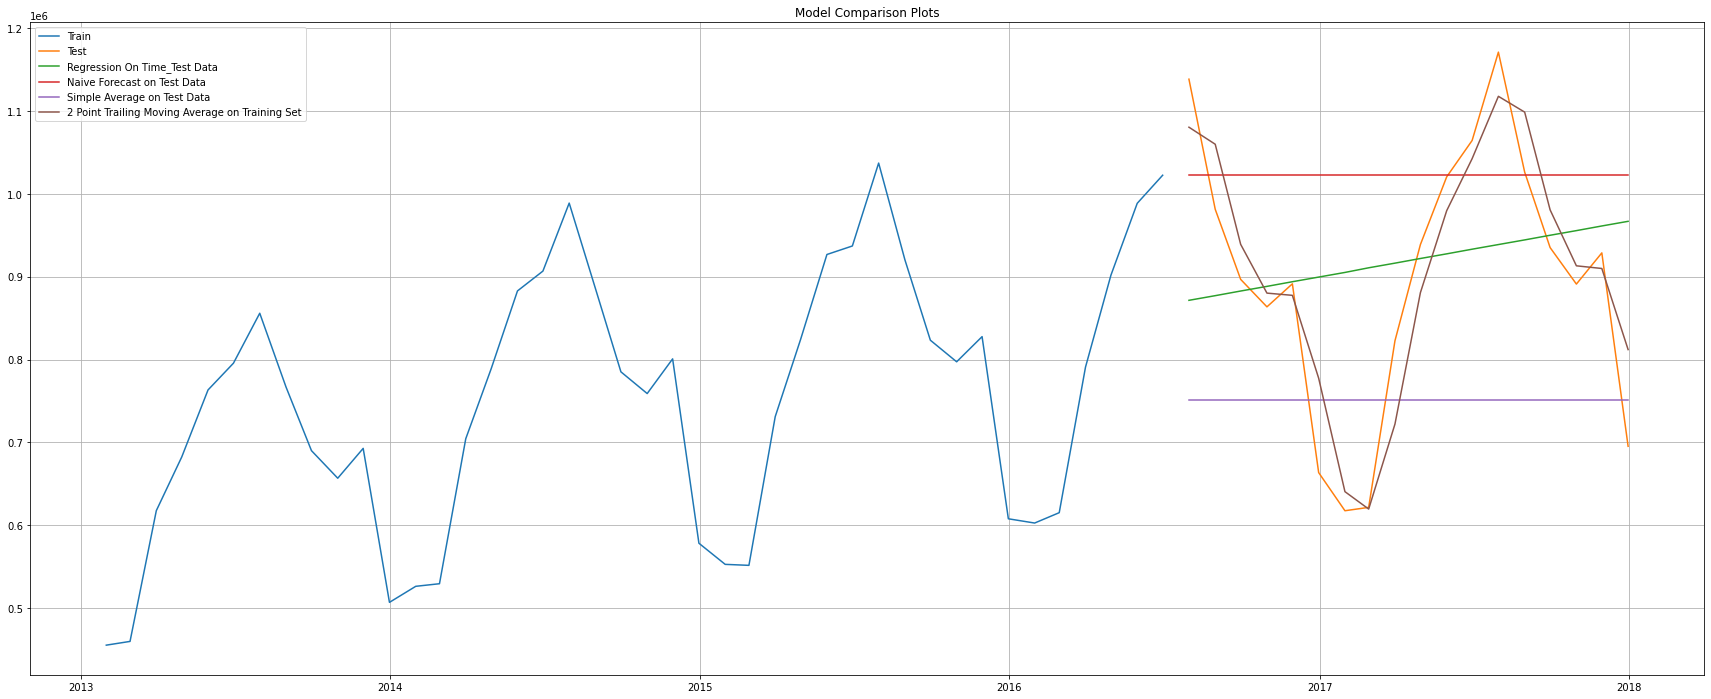

In [65]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 5: Simple Exponential Smoothing

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [67]:
SES_train = train.copy()
SES_test = test.copy()

In [68]:
SES_train.head()

,Sales
Time_Stamp,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


In [69]:
SES_train.tail()

,Sales
Time_Stamp,
2016-02-29,614957
2016-03-31,790881
2016-04-30,901950
2016-05-31,988730
2016-06-30,1022664


In [70]:
SES_test.head()

,Sales
Time_Stamp,
2016-07-31,1138718
2016-08-31,981494
2016-09-30,896831
2016-10-31,863637
2016-11-30,891448


In [71]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [72]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [73]:
model_SES_autofit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 454904.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
SES_test['predict'] = model_SES_autofit.forecast(steps=18)
SES_test.head()

,Sales,predict
Time_Stamp,,
2016-07-31,1138718,1.022664e+06
2016-08-31,981494,1.022664e+06
2016-09-30,896831,1.022664e+06
2016-10-31,863637,1.022664e+06
2016-11-30,891448,1.022664e+06


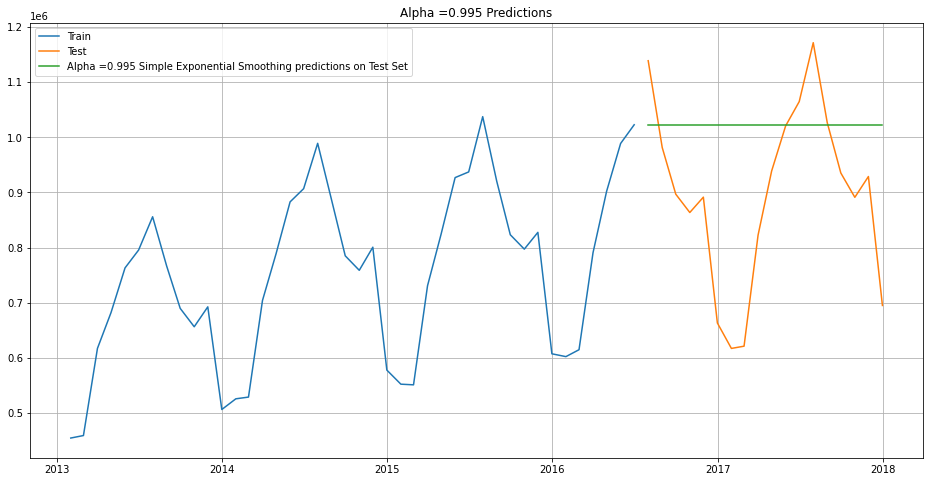

In [75]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

### Model Evaluation for $\alpha$ = 0.995 : Simple Exponential Smoothing

In [76]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
mape_model5_test_1 = metrics.mean_absolute_percentage_error(SES_test['Sales'],SES_test['predict'])*100
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1,mape_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 202735.276 MAPE is 20.98


In [77]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930
"Alpha=0.995,SimpleExponentialSmoothing",202735.275896,20.983140


#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [78]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [79]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    mape_model5_train_i = metrics.mean_absolute_percentage_error(SES_train['Sales'],SES_train['predict',i])*100
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    mape_model5_test_i = metrics.mean_absolute_percentage_error(SES_test['Sales'],SES_test['predict',i])*100
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [80]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,142953.211109,17.693754,160159.156264,15.196671
1,0.4,135095.993305,16.514662,163228.228301,15.787592
2,0.5,126505.537970,15.302064,171793.396040,17.227613
3,0.6,118395.448514,14.038045,181529.368383,18.478990
4,0.7,111396.231551,12.899690,189823.228340,19.529393
5,0.8,105719.868851,11.913398,195932.031851,20.230652
6,0.9,101377.705407,11.099267,200072.234570,20.680841
7,1.0,98333.790405,10.488128,202735.276206,20.983140


## Model Evaluation

In [81]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,142953.211109,17.693754,160159.156264,15.196671
1,0.4,135095.993305,16.514662,163228.228301,15.787592
2,0.5,126505.537970,15.302064,171793.396040,17.227613
3,0.6,118395.448514,14.038045,181529.368383,18.478990
4,0.7,111396.231551,12.899690,189823.228340,19.529393
5,0.8,105719.868851,11.913398,195932.031851,20.230652
6,0.9,101377.705407,11.099267,200072.234570,20.680841
7,1.0,98333.790405,10.488128,202735.276206,20.983140


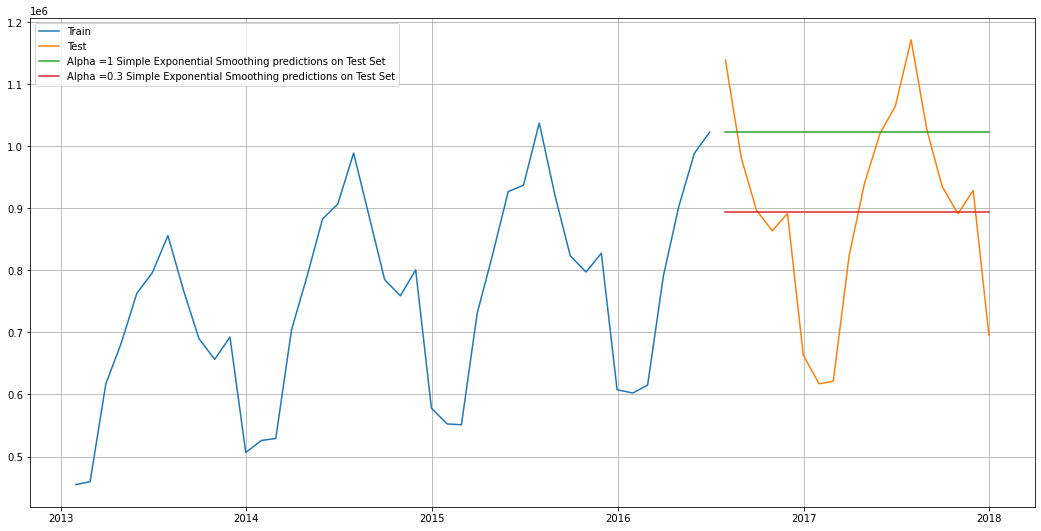

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')

plt.grid();

In [83]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6['Test RMSE'][0]],'Test MAPE':[resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930
"Alpha=0.995,SimpleExponentialSmoothing",202735.275896,20.983140
"Alpha=0.3,SimpleExponentialSmoothing",160159.156264,15.196671


## Method 6: Double Exponential Smoothing (Holt's Model)

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [84]:
DES_train = train.copy()
DES_test = test.copy()

In [85]:
# Smoothing values Level and trend
model_DES = Holt(DES_train['Sales'])

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [86]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [87]:
# i and j are alpha and beta value
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        mape_model6_train = metrics.mean_absolute_percentage_error(DES_train['Sales'],DES_train['predict',i,j])*100
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        mape_model6_test = metrics.mean_absolute_percentage_error(DES_test['Sales'],DES_test['predict',i,j])*100
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [88]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,178122.812811,22.426606,3.975960e+05,42.481215
1,0.3,0.4,191807.910808,23.372260,5.907932e+05,62.473074
2,0.3,0.5,203648.169215,23.741439,8.632864e+05,90.442981
3,0.3,0.6,211220.548542,23.615472,1.214103e+06,126.193315
4,0.3,0.7,212876.338130,23.242893,1.590692e+06,164.619224
5,0.3,0.8,208775.122480,22.116370,1.906463e+06,197.053784
6,0.3,0.9,200527.502929,21.140155,2.098086e+06,217.631936
7,0.4,0.3,164730.066832,19.362598,6.219633e+05,66.798468
8,0.4,0.4,171151.096682,19.389296,9.098194e+05,96.453890
9,0.4,0.5,172753.899800,18.635497,1.221996e+06,128.395174


Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [89]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,178122.812811,22.426606,397596.044006,42.481215
48,0.9,0.9,109446.832425,12.938667,587008.027253,64.501980
1,0.3,0.4,191807.910808,23.372260,590793.173797,62.473074
7,0.4,0.3,164730.066832,19.362598,621963.345707,66.798468
41,0.8,0.9,107618.190157,12.737434,636545.384313,69.787923


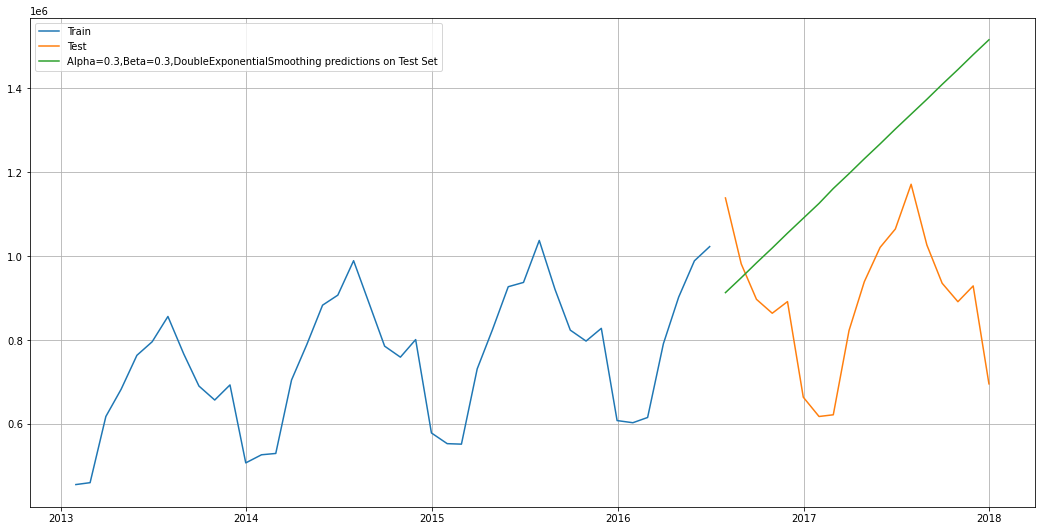

In [90]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [91]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7['Test RMSE'][0]],'Test MAPE':[resultsDf_7['Test MAPE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930
"Alpha=0.995,SimpleExponentialSmoothing",202735.275896,20.983140
"Alpha=0.3,SimpleExponentialSmoothing",160159.156264,15.196671
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397596.044006,42.481215


## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [92]:
TES_train = train.copy()
TES_test = test.copy()

In [93]:
model_TES = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [94]:
model_TES_autofit = model_TES.fit()

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [95]:
model_TES_autofit.params

{'smoothing_level': 0.6767857142857143,
 'smoothing_trend': 0.08827639751552795,
 'smoothing_seasonal': 0.3232142857142857,
 'damping_trend': nan,
 'initial_level': 533960.75,
 'initial_trend': 8293.326388888889,
 'initial_seasons': array([0.85194277, 0.8603947 , 1.15623105, 1.27776058, 1.4293972 ,
        1.48999154, 1.60296801, 1.43598757, 1.29205564, 1.22965405,
        1.29717961, 0.94877198]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sales,auto_predict
Time_Stamp,,
2016-07-31,1138718,1.131607e+06
2016-08-31,981494,1.013667e+06
2016-09-30,896831,9.147166e+05
2016-10-31,863637,8.873923e+05
2016-11-30,891448,9.349771e+05


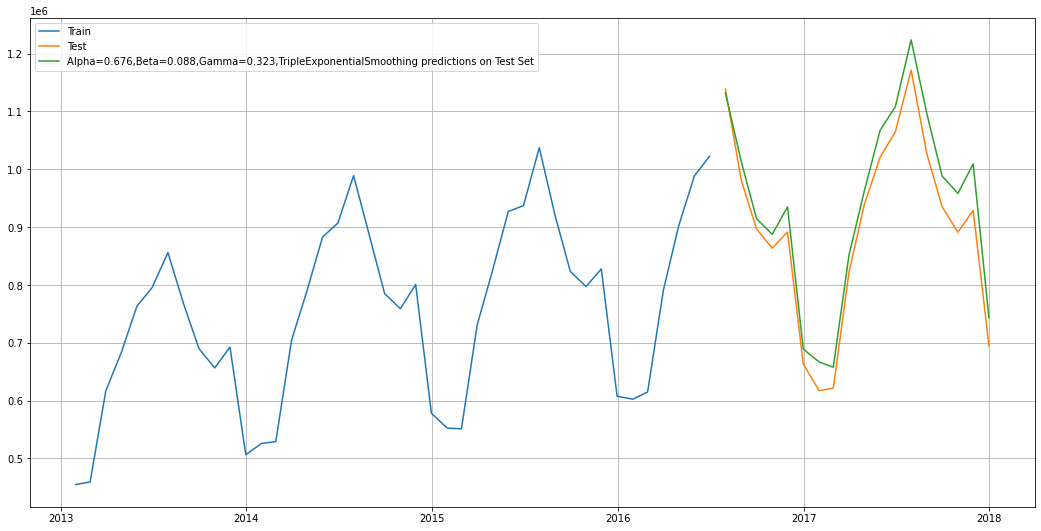

In [97]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [98]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sales'],TES_test['auto_predict'],squared=False)
mape_model6_test_1 = metrics.mean_absolute_percentage_error(TES_test['Sales'],TES_test['auto_predict'])*100
print("For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f Mape is %3.3f" %(rmse_model6_test_1,mape_model6_test_1))

For Alpha=0.676,Beta=0.088,Gamma=0.323, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 45617.969 Mape is 4.783


In [99]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1],'Test MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930
"Alpha=0.995,SimpleExponentialSmoothing",202735.275896,20.983140
"Alpha=0.3,SimpleExponentialSmoothing",160159.156264,15.196671
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397596.044006,42.481215


In [100]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [101]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            mape_model8_train = metrics.mean_absolute_percentage_error(TES_train['Sales'],TES_train['predict',i,j,k])*100
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict',i,j,k],squared=False)
            mape_model8_test = metrics.mean_absolute_percentage_error(TES_test['Sales'],TES_test['predict',i,j,k])*100
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [102]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.3,0.3,0.3,2.191900e+06,238.607064,4.131327e+06,403.692769
1,0.3,0.3,0.4,2.486883e+04,2.677535,5.429304e+04,5.537258
2,0.3,0.3,0.5,2.643749e+04,2.850396,4.135059e+04,4.184471
3,0.3,0.3,0.6,2.844818e+04,3.058589,2.931243e+04,2.873815
4,0.3,0.3,0.7,3.084455e+04,3.279388,3.303485e+04,3.449531
...,...,...,...,...,...,...,...
507,1.0,1.0,0.6,7.632986e+04,4.700573,3.794085e+05,36.213833
508,1.0,1.0,0.7,7.866396e+07,3388.855467,1.438218e+07,731.155932
509,1.0,1.0,0.8,1.278497e+08,4516.598934,4.765160e+07,2380.313432
510,1.0,1.0,0.9,2.111781e+05,9.862656,1.339951e+06,97.487302


In [103]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
480,1.0,0.7,0.3,24226.110748,2.221513,16412.236378,1.531577
456,1.0,0.4,0.3,20171.400797,1.902891,17131.789546,1.573083
264,0.7,0.4,0.3,19308.951283,1.733756,19328.851212,1.917590
465,1.0,0.5,0.4,21651.835635,2.026541,19690.325881,1.861448
448,1.0,0.3,0.3,19170.466419,1.826375,20375.820238,2.095115


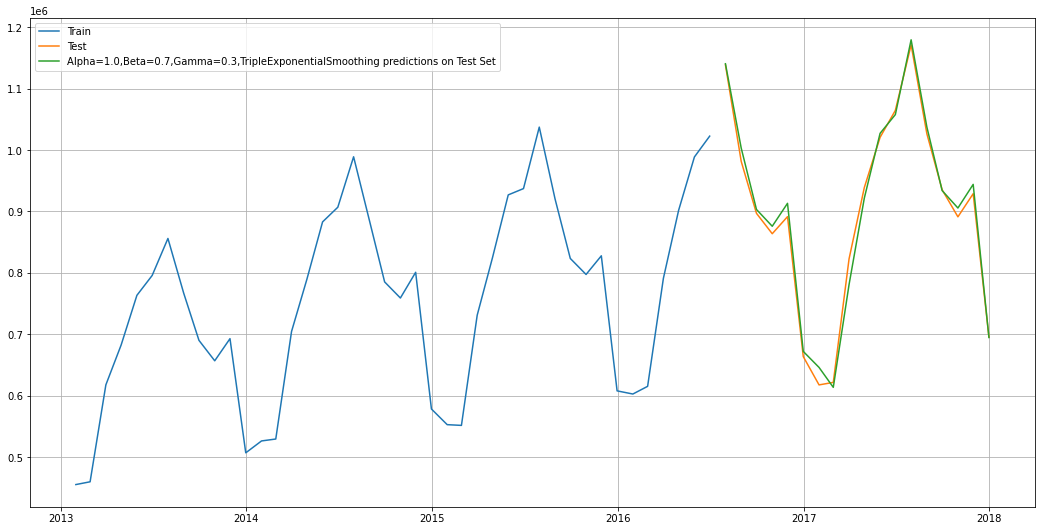

In [104]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [105]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2['Test RMSE'][480]],'Test MAPE':[resultsDf_8_2['Test MAPE'][480]]}
                           ,index=['Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
RegressionOnTime,163404.817494,15.641135
NaiveModel,202735.276206,20.983140
SimpleAverageModel,217661.008946,20.465419
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930
"Alpha=0.995,SimpleExponentialSmoothing",202735.275896,20.983140
"Alpha=0.3,SimpleExponentialSmoothing",160159.156264,15.196671
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",397596.044006,42.481215


In [106]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing",16412.236378,1.531577
"Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing",45617.969417,4.782859
2pointTrailingMovingAverage,60405.468033,5.825073
4pointTrailingMovingAverage,120837.915548,12.930773
"Alpha=0.3,SimpleExponentialSmoothing",160159.156264,15.196671
RegressionOnTime,163404.817494,15.641135
6pointTrailingMovingAverage,164346.870263,17.006390
9pointTrailingMovingAverage,185658.327563,18.021930
"Alpha=0.995,SimpleExponentialSmoothing",202735.275896,20.983140
NaiveModel,202735.276206,20.983140


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 1.0, $\beta$ = 0.7 and $\gamma$ = 0.3.

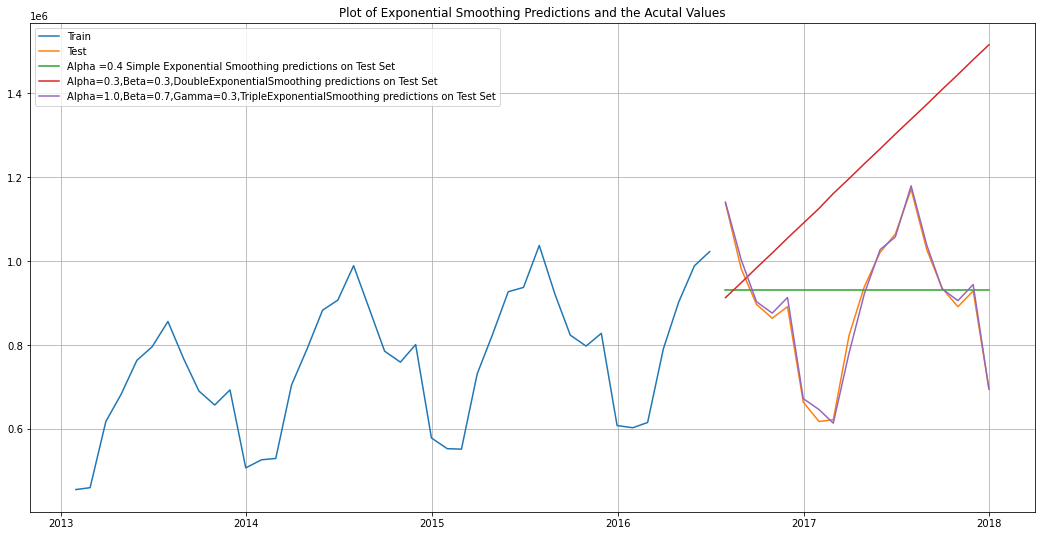

In [107]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 1.0000000000000002, 0.7000000000000002, 0.3], label='Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The two models to be built on the whole data are the following:

* Alpha=0.676,Beta=0.088,Gamma=0.323,TripleExponentialSmoothing
* Alpha=1.0,Beta=0.7,Gamma=0.3,TripleExponentialSmoothing	

In [108]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.676,
                                                                 smoothing_trend=0.058,
                                                                 smoothing_seasonal=0.323)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [109]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 16176.547666157465


In [110]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=18)

In [111]:
prediction_1

2018-01-31    6.606110e+05
2018-02-28    6.602705e+05
2018-03-31    8.587423e+05
2018-04-30    9.658089e+05
2018-05-31    1.057245e+06
2018-06-30    1.099005e+06
2018-07-31    1.211419e+06
2018-08-31    1.065847e+06
2018-09-30    9.721287e+05
2018-10-31    9.344486e+05
2018-11-30    9.787749e+05
2018-12-31    7.270489e+05
2019-01-31    6.924761e+05
2019-02-28    6.919918e+05
2019-03-31    8.998342e+05
2019-04-30    1.011840e+06
2019-05-31    1.107435e+06
2019-06-30    1.150972e+06
Freq: M, dtype: float64

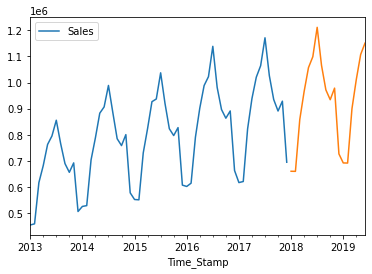

In [112]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [113]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2018-01-31,6.296499e+05,6.606110e+05,6.915721e+05
2018-02-28,6.293094e+05,6.602705e+05,6.912317e+05
2018-03-31,8.277812e+05,8.587423e+05,8.897034e+05
2018-04-30,9.348477e+05,9.658089e+05,9.967700e+05
2018-05-31,1.026284e+06,1.057245e+06,1.088206e+06


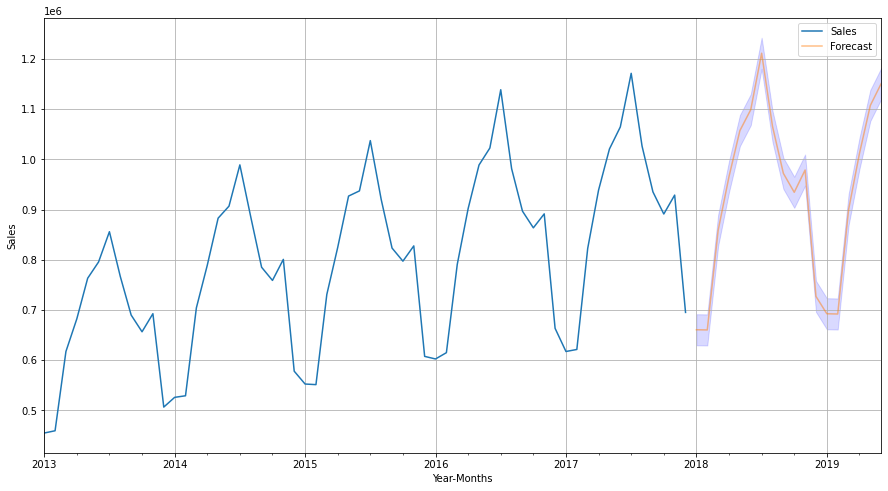

In [114]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='b', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

Let us now build the second model using the same parameters on the full data and check the confidence bands when we forecast into the future for the length of the test set.

In [115]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=1.0,
                                                                 smoothing_trend=0.7,
                                                                 smoothing_seasonal=0.3)

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [116]:
RMSE_fullmodel2 = metrics.mean_squared_error(df['Sales'],fullmodel2.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel2)

RMSE: 24016.343558358796


In [117]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_2 = fullmodel2.forecast(steps=18)

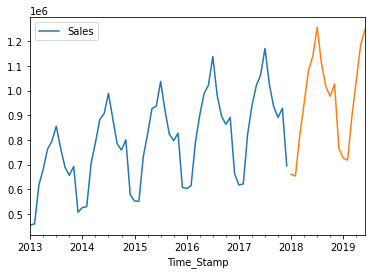

In [118]:
df.plot()
prediction_2.plot();

In [119]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_2_df = pd.DataFrame({'lower_CI':prediction_2 - 1.96*np.std(fullmodel1.resid),
                          'prediction':prediction_2,
                          'upper_ci': prediction_2 + 1.96*np.std(fullmodel1.resid)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
2018-01-31,6.298230e+05,6.605251e+05,6.912271e+05
2018-02-28,6.230991e+05,6.538011e+05,6.845031e+05
2018-03-31,7.873910e+05,8.180930e+05,8.487950e+05
2018-04-30,9.187277e+05,9.494297e+05,9.801318e+05
2018-05-31,1.050961e+06,1.081663e+06,1.112365e+06


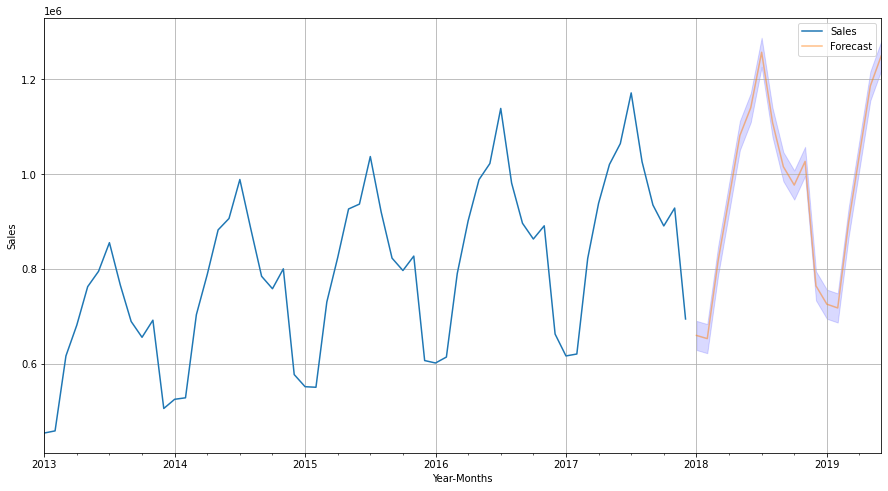

In [120]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual',figsize=(15,8))
pred_2_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index,pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='b', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

###### Note: Please do go ahead and build the remaining models on the full data and check how the confidence bands around the prediction look. 

# END